In [74]:
import numpy as np
import seaborn as sns

Here is the post-processing notebook. As of writing this, the code only exports a txt file "highestXPos.txt". The file contains the highestXPos at each frame, with each line in the text file being a single frame. This notebook serves as a "sketchbook" for post-processing, before it is written in the napari plugin.

Ideas:
- ~~Trim the data after towards the end (after smoothing, etc.)~~ I want to benchmark the average speed at each step so I have to do this step first now
- Variable names will be like the steps taken (e.g. smoothed twice = "dataSmoothSmooth", smoothed then cropped = "dataSmoothCrop")

In [75]:
# Import highestXPos.txt and preview it
data = np.loadtxt("/Users/kyle/Desktop/mock ros videos/DSC_0357_Test_No26_720_2997FPS/highestXPos.txt")

<Axes: >

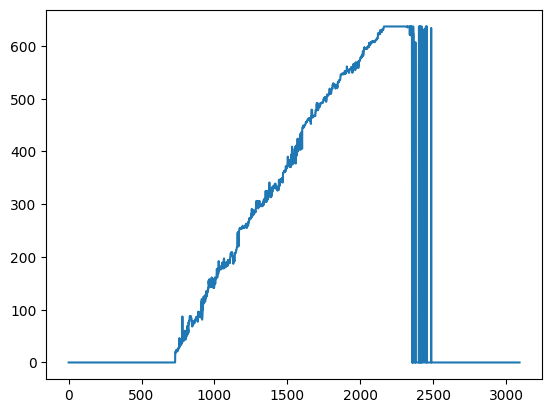

In [76]:
# Plot data
sns.lineplot(data=data)

In [77]:
# Get the max index
maxIndex = data.argmax()

# Get the first index where there is a value above zero
firstIndex = np.where(data > 0)[0][0]

# TODO: Make sure to check weird edge cases
dataTrim = data[firstIndex:maxIndex]

<Axes: >

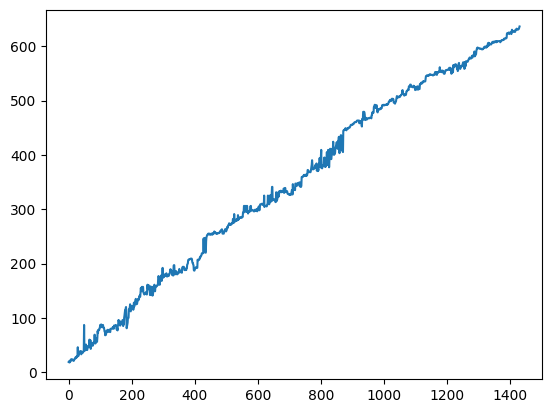

In [78]:
# Plot dataTrim
sns.lineplot(data=dataTrim)

<Axes: >

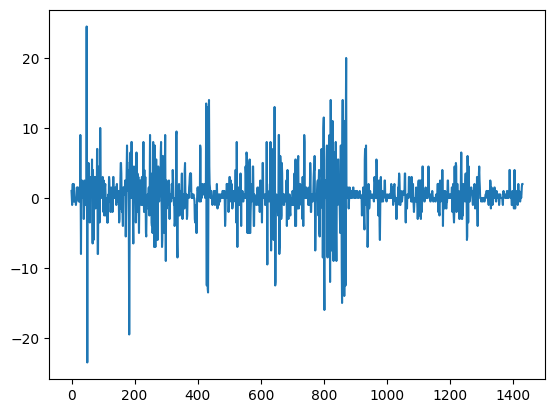

In [79]:
# Get the gradient
dataTrimGradient = np.gradient(dataTrim)

# Plot dataTrimGradient
sns.lineplot(data=dataTrimGradient)

In [80]:
# Get the average speed
dataTrimGradientAvgSpeed = np.average(dataTrimGradient)
print(dataTrimGradientAvgSpeed)

0.43221523410202656


In [81]:
# Smooth data with moving average
# (what MATLAB's smoothdata() does)
# TODO: I don't know the window matlab uses
window = 100
dataTrimSmooth = np.convolve(dataTrim, np.ones(window), 'valid') / window

<Axes: >

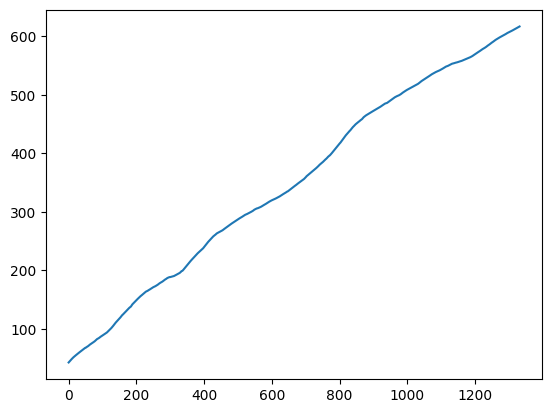

In [82]:
# Plot smoothed data
sns.lineplot(data=dataTrimSmooth)

<Axes: >

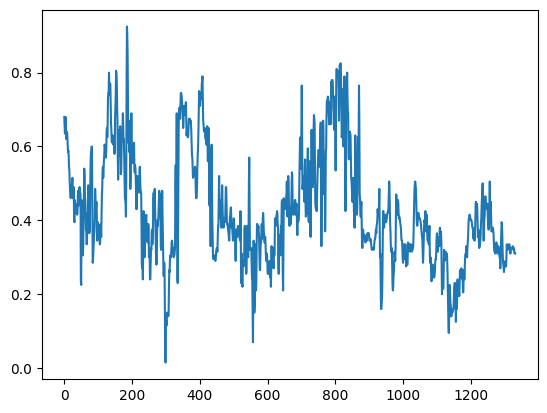

In [83]:
# Get the gradient
dataTrimSmoothGradient = np.gradient(dataTrimSmooth)

# Plot dataTrimSmoothGradient
sns.lineplot(data=dataTrimSmoothGradient)

In [84]:
# Get the average speed
dataTrimSmoothGradientAvgSpeed = np.average(dataTrimSmoothGradient)
print(dataTrimSmoothGradientAvgSpeed)

0.4309722222222221


In [85]:
print("Without smoothing:", dataTrimGradientAvgSpeed)
print("   With smoothing:", dataTrimSmoothGradientAvgSpeed)
print("")
print("Difference:", dataTrimSmoothGradientAvgSpeed - dataTrimGradientAvgSpeed)

Without smoothing: 0.43221523410202656
   With smoothing: 0.4309722222222221

Difference: -0.0012430118798044676
